In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import pickle
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

Récupération des données du csv et traitement, nettoyage, tri...
Modification des données pour qu'elles soient toutes numériques, pour pouvoir les traiter en machine learning

In [33]:
df = pd.read_csv("csv/carprice.csv")
df[['marque', 'modele']] = df["CarName"].str.split(' ', 1, expand=True)
df = df.drop(["car_ID", "symboling", "CarName", "doornumber", "stroke", "compressionratio", "peakrpm", "modele"], axis=1)
df.rename(columns={
    "fueltype": "carburant",
    "aspiration": "turbo",
    "carbody": "type_vehicule",
    "drivewheel": "roues_motrices",
    "enginelocation": "emplacement_moteur",
    "wheelbase": "empattement",
    "carlength": "longueur",
    "carwidth": "largeur",
    "carheight": "hauteur",
    "curbweight": "poids",
    "enginetype": "type_moteur",
    "cylindernumber": "nombre_cylindres",
    "enginesize": "taille_moteur",
    "fuelsystem": "systeme_carburant",
    "boreratio": "taux_alesage",
    "horsepower": "chevaux",
    "citympg": "consommation_ville",
    "highwaympg": "consommation_autoroute",
    "price": "prix"
}, inplace=True)
marque_dict = {
    'alfa-romero': 'alfa-romeo',
    'maxda': 'mazda',
    'porcshce': 'porsche',
    'toyouta': 'toyota',
    'vokswagen': 'volkswagen',
    'vw': 'volkswagen',
    'Nissan': 'nissan'
}
df['marque'] = df['marque'].replace(marque_dict, regex=True)
df['carburant'].replace(['gas', 'diesel'], [0, 1], inplace=True)
df['turbo'].replace(['std', 'turbo'], [0, 1], inplace=True)
liste_vehicule = df['type_vehicule'].unique()
df['type_vehicule'].replace(liste_vehicule, list(range(0,5)), inplace=True)
df['roues_motrices'].replace(['rwd', '4wd', 'fwd'], [0, 1, 2], inplace=True)
df['emplacement_moteur'].replace(['front', 'rear'], [0, 1], inplace=True)
df['empattement'] = df['empattement']*2.54
df['longueur'] = df['longueur']*2.54
df['largeur'] = df['largeur']*2.54
df['hauteur'] = df['hauteur']*2.54
df['poids'] = df['poids']*0.45359237
liste_moteur = df['type_moteur'].unique()
df['type_moteur'].replace(liste_moteur,list(range(0,7)), inplace=True)
cylindre_dict = {
    "two": 2,
    "three": 3,
    "four": 4,
    "five": 5,
    "six": 6,
    "eight": 8,
    "twelve": 12,
}
df['nombre_cylindres'] = df['nombre_cylindres'].replace(cylindre_dict, regex=True)
df['taille_moteur'] = df['taille_moteur']*16.3870640693
liste_carburant = df['systeme_carburant'].unique()
df['systeme_carburant'].replace(liste_carburant, list(range(0,8)), inplace=True)
df['taux_alesage'] = df['taux_alesage']*25.4
df['consommation_ville'] = df['consommation_ville']*0.425144
df['consommation_autoroute'] = df['consommation_autoroute']*0.425144
liste_marque = df["marque"].unique()
print(liste_marque)
df['marque'].replace(liste_marque, list(range(0,22)), inplace=True)
df.head()

['alfa-romeo' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'buick' 'mercury' 'mitsubishi' 'nissan' 'peugeot' 'plymouth'
 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen' 'volvo']


/tmp/ipykernel_24654/1040199592.py:2: FutureWarning: In a future version of pandas all arguments of StringMethods.split except for the argument 'pat' will be keyword-only.
  df[['marque', 'modele']] = df["CarName"].str.split(' ', 1, expand=True)


,carburant,turbo,type_vehicule,roues_motrices,emplacement_moteur,empattement,longueur,largeur,hauteur,poids,type_moteur,nombre_cylindres,taille_moteur,systeme_carburant,taux_alesage,chevaux,consommation_ville,consommation_autoroute,prix,marque
0,0,0,0,0,0,225.044,428.752,162.814,123.952,1155.753359,0,4,2130.318329,0,88.138,111,8.928024,11.478888,13495.0,0
1,0,0,0,0,0,225.044,428.752,162.814,123.952,1155.753359,0,4,2130.318329,0,88.138,111,8.928024,11.478888,16500.0,0
2,0,0,1,0,0,240.030,434.848,166.370,133.096,1280.491261,1,6,2490.833739,0,68.072,154,8.077736,11.053744,16500.0,0
3,0,0,2,2,0,253.492,448.564,168.148,137.922,1060.045369,2,4,1786.189984,0,81.026,102,10.203456,12.754320,13950.0,1
4,0,0,2,1,0,252.476,448.564,168.656,137.922,1280.944853,2,5,2228.640713,0,81.026,115,7.652592,9.353168,17450.0,1


Création et test d'un premier modèle de machine learning avec la régression linéaire

In [14]:
# y = df['prix']
# X = df.drop('prix', axis=1)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# model = LinearRegression()
# model.fit(X_train, y_train)

# y_pred = model.predict(X_test)

# r2 = r2_score(y_test, y_pred)
# mse = mean_squared_error(y_test, y_pred)
# print(f"R² score: {r2:.2f}")
# print(f"MSE: {mse:.2f}")

R² score: 0.86
MSE: 10944937.47


Definition pour faire une prédiction

In [34]:
%%writefile price_calc.py
import numpy as np

def price_calc(model, carburant, turbo, type_vehicule, roues_motrices, emplacement_moteur, empattement, longueur, largeur, hauteur, poids, type_moteur, nombre_cylindres, taille_moteur, systeme_carburant, taux_alesage, chevaux, consommation_ville, consommation_autoroute, marque):
    x = np.array([carburant, turbo, type_vehicule, roues_motrices, emplacement_moteur, empattement, longueur, largeur, hauteur, poids, type_moteur, nombre_cylindres, taille_moteur, systeme_carburant, taux_alesage, chevaux, consommation_ville, consommation_autoroute, marque]).reshape(1, 19)
    price = model.predict(x)
    return int(price)

Overwriting price_calc.py


Création et test d'un autre modèle avec RandomForestRegressor

In [19]:
y = df['prix']
X = df.drop('prix', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print(f"R² score: {r2:.2f}")
print(f"MSE: {mse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"RMSE: {rmse:.2f}")

R² score: 0.96
MSE: 3437161.72
MAE: 1304.50
RMSE: 1853.96


Création d'une courbe d'apprentissage sur le modèle

[ 13  26  39  52  65  78  91 104 117 131]


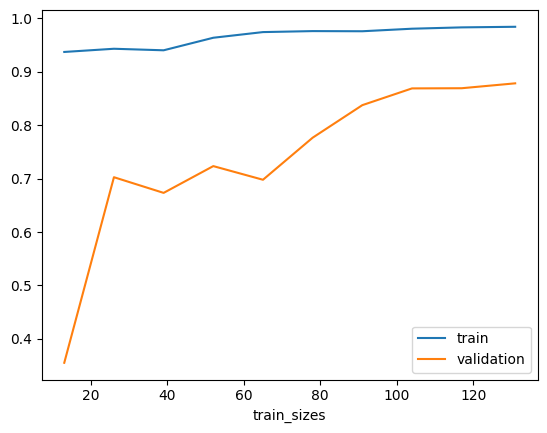

In [20]:
from sklearn.model_selection import learning_curve
import matplotlib.pyplot as plt

N, train_score, val_score = learning_curve(model, X_train, y_train, train_sizes=np.linspace(0.1,1.0,10), cv=5)

print(N)
plt.plot(N, train_score.mean(axis=1), label='train')
plt.plot(N, val_score.mean(axis=1), label='validation')
plt.xlabel('train_sizes')
plt.legend()

Utilisation de GridSearchCV pour trouver les meilleurs paramètres à exploiter

In [24]:
param_grid = {'n_estimators': [50, 100, 200, 500],
    'max_depth': [5, 10, 15],
    'max_features': ['sqrt', 'log2']}

grid = GridSearchCV(RandomForestRegressor(), param_grid, cv=5)

grid.fit(X_train, y_train)
grid.best_score_

0.9108384383898777

Liste des meilleurs paramètres parmis ceux testés

In [25]:
grid.best_params_

{'max_depth': 10, 'max_features': 'sqrt', 'n_estimators': 100}

Création du nouveau modèle sur la base des paramètres trouvés plus tôt

In [29]:
model = grid.best_estimator_
model.score(X_test, y_test)

model = RandomForestRegressor(**grid.best_params_)
model.fit(X_train, y_train)

with open('modele.pkl', 'wb') as f:
    pickle.dump(model, f) 